# Klasyka

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler

In [4]:
seed = 1123

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa3/australia.csv")

# Ramka

In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

# Podział zbioru

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(f"df shape: {df.shape}, X shape: {X.shape}, y shape: {y.shape}")

df shape: (56420, 18), X shape: (56420, 17), y shape: (56420,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (39494, 17), X_test shape: (16926, 17), y_train shape: (39494,), y_test shape: (16926,)


In [8]:
def rate_model(model, X_test_set=None):
  if X_test_set is not None:
    X_t = X_test_set 
  else:
    X_t = X_test
  y_predicted = model.predict(X_t)
  y_proba = model.predict_proba(X_t)[:, 1]
  print(
    f""" 
    Model: {model.__class__}
    Accuracy: {accuracy_score(y_test, y_predicted)},
    F1 score: {f1_score(y_test, y_predicted)},
    ROC AUC score: {roc_auc_score(y_test, y_proba)}
    """
  )

# Modele

In [9]:
dtc = DecisionTreeClassifier(max_leaf_nodes=16, criterion="entropy", min_samples_split=20, random_state=seed+1)
dtc.fit(X=X_train, y=y_train)
rate_model(dtc)

 
    Model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
    Accuracy: 0.836937256292095,
    F1 score: 0.5699594889373637,
    ROC AUC score: 0.853293624775484
    


Drzewo decyzyjne

* `max_leaf_nodes` maksymalna liczba liści w drzewie decyzyjnym 
* `criterion` rozdzaj kryterium entropii, zazwyczaj nie ma znaczenia, ale Gini impurity jest szybszy do wyliczenia 
* `min_samples_split` najmniejsza liczba próbek w liściu, przy której rozważać podział 
* `random_state` nasiono losowości, potrzebne do odtwarzania wyników

In [10]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, max_samples=0.3, max_features="sqrt", random_state=seed+3)
rfc.fit(X=X_train, y=y_train)
rate_model(rfc)

 
    Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
    Accuracy: 0.836878175587853,
    F1 score: 0.4830556075641266,
    ROC AUC score: 0.8661888528180391
    


Las losowy

* `n_estimators` liczba drzew w lesie losowym
* `max_depth` maksymalna głębokość drzewa w lesie
* `max_samples` liczba/proporcja wykorzystywanych próbek do bootstrapowania
* `max_features` liczba/proporcja cech użytych do uczenia drzew

In [11]:
knc = KNeighborsClassifier(n_neighbors=3, weights="distance", algorithm="ball_tree", leaf_size=10)
knc.fit(X=X_train, y=y_train)
rate_model(knc)

 
    Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
    Accuracy: 0.8279569892473119,
    F1 score: 0.5747663551401869,
    ROC AUC score: 0.7987244973612514
    


K-Sąsiadów

* `n_neighbors` liczba sąsiadów decydujących o predykcji
* `weights` wagi głosowań sąsiadów - według dystansu lub po równo
* `algorithm` algorytm znajdywania najbliższych sąsiadów
* `leaf_size` parametr przekazywany algorytmowi znajdowania najbliższych sąsiadów


# Ocena miar jakości

**Accuracy**

Prosta metryka, dzieli liczbę prawidłowo odgadniętych etykiet przez liczbę wszystkich.
* Łatwo wytłumaczyć
* Słaba przy niezbalansowanych zbiorach.

**ROC AUC**

Metryka wykorzystująca krzywą ROC do ocenienia modelu. 
* Może być używana tylko, gdy jest w jakimś sensie możliwość przesuwania granicy decyzyjnej. 
* Łatwa wizualizacja poprzez krzywą ROC
* Może być mało efektywna przy niezbalansowanych zbiorach.

**F1**

Metryka wykorzystująca średnią harmoniczną z precision i recall.

* Czuła na niezbalansowane zbiory
* Pokazuje systematyczne problemy

W naszym przypadku najlepszą metryką jest **F1**, ponieważ zbiór etykiet jest przechylony w kierunku 0. Widać zalety tej metryki na confusion matrix - jest prawie 2 razy więcej FN niż TP. W zależności na czym nam zależy bardziej może to być niezły wynik, jak wskazuje ROC AUC, albo słaby - na co wskazuje F1

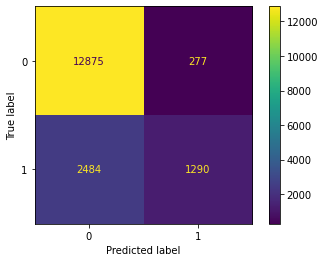

In [12]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(rfc, X_test, y_test, values_format="d")
plt.show()

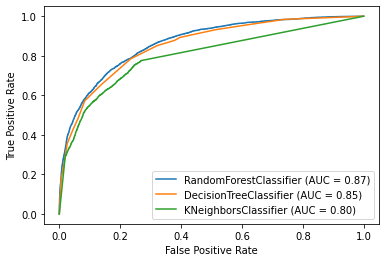

In [13]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc, X_test, y_test)
disp = plot_roc_curve(dtc, X_test, y_test, ax=disp.ax_)
disp = plot_roc_curve(knc, X_test, y_test, ax=disp.ax_)

plt.show()

# Popsułem :(

Chciałem wypróbować też inne modele, ale nie wiem czy coś popsułem, czy "te modele tak mają"

In [14]:
# gpc = GaussianProcessClassifier(random_state=seed+2, copy_X_train=False)
# gpc.fit(X=X_train, y=y_train)
# rate_model(dtc)

# Out of memory 

In [15]:
svm = SVC(kernel="linear", probability=True, max_iter=1000, C=0.1)
scaler = StandardScaler()
scaler.fit(X)
svm.fit(
    X=scaler.transform(X_train), y=y_train
)
rate_model(svm, X_test_set=scaler.transform(X_test))

# Very long training times, doesn't converge.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


 
    Model: <class 'sklearn.svm._classes.SVC'>
    Accuracy: 0.35466146756469336,
    F1 score: 0.406519967400163,
    ROC AUC score: 0.8331859392668753
    
